This notebook engages with the PELDOR (Pulsed Electron-eLectron DOouble Resonance) measurements published in the following two papers:

**1**. Andriy Marko, Vasyl Denysenkov, Dominik Margraf, Pavol Cekan, Olav Schiemann, Snorri Th. Sigurdsson, and Thomas F. Prisner; Conformational Flexibility of DNA, *J. Am. Chem. Soc.* 2011, 133, 13375–13379.

**2**. Karin Halbmair, Jan Seikowski, Igor Tkach, Claudia Höbartner, Deniz Sezer, Marina Bennati; High-resolution measurement of long-range distances in RNA: pulse EPR spectroscopy with TEMPO-labeled nucleotides, *Chemical Science* 2016, 7, 3172-3180.

Additional, unpublished measurements performed by Maximilian Gauger in the group of Prof. Thomas Prisner are also analyzed.

# 1. Structural analysis

In [1]:
from utils_helix  import Helix #, helix_along_z_pdb
from utils_peldor import plot_distances

In [2]:
import numpy as np
import py3Dmol

In [3]:
# clear contents of scratch directory 
! rm pdbs/*.*

### Experimental PELDOR distances

In [4]:
#Marko  JACS 2011 (label=1)
exp_id_dna   = [4,5,6,7,8,9,10,11,12,13,14]
exp_dist_dna = [20.1,23.8,25.4,26.6,28.4,30,32.2,34.1,38.3,42.9,45.0]
exp_Dr_dna   = [2.3, 6., 5.6, 3.0, 2.8, 4.0, 5.5, 6.0, 7.0, 7.3, 6.8]
exp_dna = [exp_id_dna,exp_dist_dna,exp_Dr_dna]

#Halbmair Chem Science 2016 (label=2)
exp_id_rna_long   = [10,15,18,22,25,28] #16,24,28,31
exp_dist_rna_long = [30.7,43.2,53.3,63.2,73.,81.]
exp_Dr_rna_long   = [2.,2.,3.,4.,4.,5.]
exp_rna_long = [exp_id_rna_long,exp_dist_rna_long,exp_Dr_rna_long]

#Gauger unpublished (label=1)
exp_id_rna   = [7,8,9,10,11,12,13,14]
exp_dist_rna = [21.2,23.2,26.6,28.7,31.0,33.6,36.2,38.1]
exp_Dr_rna   = [4.8, 5.1, 5.0, 5.4, 5.3, 5.7, 5.8, 5.7]
exp_rna = [exp_id_rna,exp_dist_rna,exp_Dr_rna]

#label = 3 (Gauger unpublished)
exp_id_dna_2 = [8]
exp_dist_dna_2 = [31.2]

exp_id_rna_2 = [11]
exp_dist_rna_2 = [30.3]

### Provide sequence of the first helix strand
A,C,G,T: regular bases

c, g   : spin label 

In [5]:
#Marko JACS 2011 and Max unpublished (label=1)
dna_sequence_evn = 'GTcAGTCgCgCgCgCgCATC'
dna_sequence_odd = 'GTcAGTgCgCgCgCgCgATC'

#Halbmair Chem Science 2016 (label=2)
rna_sequence_6 = 'GACGUcGGAAGACGUcAGUAGACcUCGcAUcGU'
#sequence_3 = 'GAcGUCGGAAGACGUcAGUAGACCUCGCAUcGU'
rna_sequence_3 = 'ACgAUGCGAGGUCUACUgACGUCUUCCGACgUC'

#Gauger unpublished (label=1)
rna_sequence_evn = 'GUcAGUCGCgCgCgCgCAUC' 
rna_sequence_odd = 'GUcAGUGCGCgCgCgCgAUC' 

## A. dsDNA
### Select helix type, base step parameters and base pair flatness

In [6]:
na_type    = 'DNA' # 'DNA' or 'RNA'
helix_form = 'B'   # 'B' or 'A' or 'Apr'
bs_param   = 'seq' # 'avg' or 'seq'

dna_type = na_type + bs_param + helix_form

label      = 1     # 1 or 2 or 3

bp_flat    = False # True or False

plot_title = f"{helix_form}-{na_type}, Label:{label},  Flat:{bp_flat}"

### Make the even and odd DNA helices

In [7]:
helix_dna_evn = Helix(dna_sequence_evn, dna_type, label, True)
helix_dna_odd = Helix(dna_sequence_odd, dna_type, label)
if not bp_flat:
    helix_dna_evn.unflat()
    helix_dna_odd.unflat()

[3.378156 3.388646 3.367509 3.366508 3.378156 3.388646 3.356936 3.399471
 3.356936 3.399471 3.356936 3.399471 3.356936 3.399471 3.356936 3.399471
 3.367509 3.366606 3.388646]
3.3774955217631506


In [8]:
#helix_along_z_pdb(helix_dna_evn)

### Visualize one of the generated helices

In [9]:
#!jupyter labextension install jupyterlab_3dmol

In [10]:
pdb_file = 'helix_dna_evn.pdb'
helix_dna_evn.write_pdb(pdb_file)
helix_dna_evn.write_axis_pdb()
helix_dna_evn.write_center_pdb()

view = py3Dmol.view()

view.addModel(open('pdbs/' + pdb_file, 'r').read(),'pdb')
#view.addModel(open('pdbs/axis.pdb', 'r').read(),'pdb')
#view.addModel(open('pdbs/center.pdb', 'r').read(),'pdb')

view.setStyle({'stick': {'color':'spectrum'}})
#view.setStyle({'sphere': {'color':'spectrum'}})

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Get distances between each label and the first one and compare with PELDOR

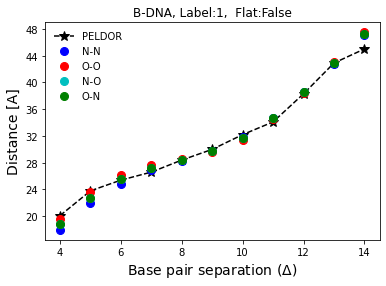

In [11]:
plot_distances(helix_dna_evn, helix_dna_odd, exp_dna, plot_title, error_bars=False)

## B. dsRNA of Halbmair et al.

In [12]:
na_type    = 'RNA' # 'DNA' or 'RNA'
helix_form = 'A' # 'B' or 'A' or 'Apr'
bs_param   = 'avg' # 'avg' or 'seq'

label      = 2

rna_type_long = na_type + bs_param + helix_form

bp_flat    = False # True or False

plot_title = f"{helix_form}-{na_type}, Label:{label},  Flat:{bp_flat}"

helix_rna_6 = Helix(rna_sequence_6, rna_type_long, label, True)
helix_rna_3 = Helix(rna_sequence_3, rna_type_long, label)
if not bp_flat:
    helix_rna_6.unflat()
    helix_rna_3.unflat()

[2.805856 2.799048 2.827238 2.799048 2.805856 2.827238 2.810846 2.805856
 2.810846 2.815772 2.805856 2.799048 2.827238 2.799048 2.805856 2.8223
 2.815772 2.799048 2.817387 2.815772 2.805856 2.799048 2.810846 2.815772
 2.805856 2.827238 2.793838 2.8223   2.804181 2.805856 2.827238 2.799048]
2.810375294355712


In [13]:
pdb_file = 'helix_rna_6.pdb'
helix_rna_6.write_pdb(pdb_file)
helix_rna_6.write_axis_pdb()
helix_rna_6.write_center_pdb()


view = py3Dmol.view()

view.addModel(open('pdbs/' + pdb_file, 'r').read(),'pdb')
view.addModel(open('pdbs/axis.pdb', 'r').read(),'pdb')
view.addModel(open('pdbs/center.pdb', 'r').read(),'pdb')

view.setStyle({'stick': {'color':'spectrum'}})
#view.setStyle({'sphere': {'color':'spectrum'}})

view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

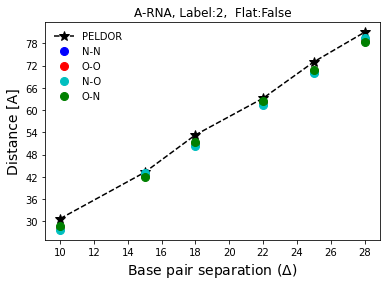

In [14]:
plot_distances(helix_rna_6, helix_rna_3, exp_rna_long, plot_title, error_bars=False)

## C. dsRNA of Gauger

In [15]:
na_type    = 'RNA' # 'DNA' or 'RNA'
helix_form = 'Apr' # 'B' or 'A' or 'Apr'
bs_param   = 'avg' # 'avg' or 'seq'

label      = 1

rna_type = na_type + bs_param + helix_form

bp_flat    = False # True or False

plot_title = f"{helix_form}-{na_type}, Label:{label},  Flat:{bp_flat}"

helix_rna_evn = Helix(rna_sequence_evn, rna_type, label, True)
helix_rna_odd = Helix(rna_sequence_odd, rna_type, label)
if not bp_flat:
    helix_rna_evn.unflat()
    helix_rna_odd.unflat()

[2.996413 3.002239 3.014228 3.009642 2.996413 3.002239 3.018155 2.992759
 3.018155 2.992759 3.018155 2.992759 3.018155 2.992759 3.018155 2.992759
 3.014228 3.000506 3.002239]
3.0048797112435586


In [16]:
#helix_along_z_pdb(helix_rna_odd)

In [17]:
pdb_file = 'helix_rna_evn.pdb'
helix_rna_evn.write_pdb(pdb_file)
helix_rna_evn.write_axis_pdb()
helix_rna_evn.write_center_pdb()

view = py3Dmol.view()
#read the PDB files
view.addModel(open('pdbs/' + pdb_file, 'r').read(),'pdb')
view.addModel(open('pdbs/axis.pdb', 'r').read(),'pdb')
view.addModel(open('pdbs/center.pdb', 'r').read(),'pdb')

view.setStyle({'stick': {'color':'spectrum'}})
#view.setStyle({'sphere': {'color':'spectrum'}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

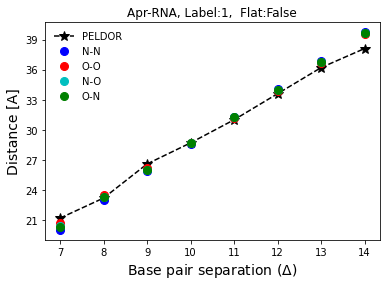

In [18]:
plot_distances(helix_rna_evn, helix_rna_odd, exp_rna, plot_title, error_bars=False)

# 2. Vibrational anlaysis of an elastic network model

In [19]:
from utils_elastic import ANM_analysis, generate_ensemble, plot_histograms, write_pdb_modes, write_pdb_nodes

In [20]:
# clear contents of scratch directory 
! rm pdbs/*.*

In [21]:
n_models = 11
scale = 0.035

n_samples = 2*512

## A. dsDNA

In [22]:
n_low = 5
mask = [1,1,1,1,0]

### Even sequence

In [23]:
enm_helix = helix_dna_evn
pdb = 'dna_evn'

eVals, eVecs, links = ANM_analysis(enm_helix, n_low, verbose=True)

number of links: 248
number of nodes: 60
rank of the (180, 180) matrix: 174

lowest 6 eigenvalues: (should be zeros)
[0.-0.j 0.+0.j 0.-0.j 0.+0.j 0.+0.j 0.+0.j]

next 5 eigenvalues: (should be real)
[0.000019+0.j 0.00002 +0.j 0.000109+0.j 0.000114+0.j 0.0002  +0.j]
  eVals       ratio    amplitude of oscillation
  0.000019    1.00     1.000
  0.000020    1.01     0.993
  0.000109    5.60     0.423
  0.000114    5.84     0.414
  0.000200   10.26     0.312

check orthogonality of the eigenvectors that belong to above eigenvalues:
[[ 1.  0.  0. -0. -0.]
 [ 0.  1. -0. -0.  0.]
 [ 0. -0.  1. -0. -0.]
 [-0. -0. -0.  1.  0.]
 [-0.  0. -0.  0.  1.]]
reshape lowest 5 eigenvectors from (180, 5)
to (5, 3, 20, 3)
and to (5, 20, 3, 3)


In [24]:
write_pdb_nodes(enm_helix, links, eVecs, eVals, pdb, n_models, scale = scale)
write_pdb_modes(enm_helix, eVecs, eVals, pdb, n_models, scale=scale)

In [25]:
mode = 3

pdb_file = 'pdbs/dna_evn_mode' + str(mode) + '.pdb'

with open(pdb_file) as ifile:
    system = "".join([x for x in ifile])
    
view = py3Dmol.view()
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
view.animate({'loop': "backAndForth"})
view.zoomTo()
view.show()    

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [26]:
NN_all, OO_all, NO_all, ON_all, idx_evn = generate_ensemble(enm_helix, eVecs, eVals, 
                                                            mask, n_samples, scale=scale)
dist_evn = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=0)
#dist_evn.shape

### Odd sequence

In [27]:
enm_helix = helix_dna_odd
pdb = 'dna_odd'

eVals, eVecs, links = ANM_analysis(enm_helix, n_low, verbose=False)

NN_all, OO_all, NO_all, ON_all, idx_odd = generate_ensemble(enm_helix, eVecs, eVals, 
                                                            mask, n_samples, scale)
dist_odd = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=0)
#print(dist_odd.shape)

number of links: 248
number of nodes: 60
reshape lowest 5 eigenvectors from (180, 5)
to (5, 3, 20, 3)
and to (5, 20, 3, 3)


### Combine Even and Odd

In [28]:
dist_all_dna = np.concatenate([dist_evn,dist_odd],axis=-1)
idx_all_dna = np.concatenate([idx_evn,idx_odd],axis=-1)

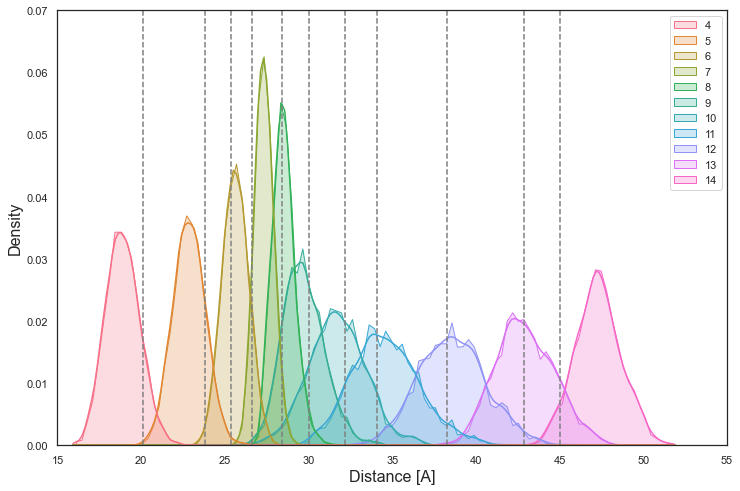

In [29]:
xlim = (15,55)
ylim = (0,0.07)
plot_histograms(dist_all_dna,idx_all_dna,exp_dna,xlim,ylim)

## B. dsRNA  of Halbmair

In [30]:
n_low = 5
mask = [1,1,1,1,0]

In [31]:
enm_helix = helix_rna_6
pdb = 'rna_6'

eVals, eVecs, links = ANM_analysis(enm_helix, n_low, verbose=True)

NN_all, OO_all, NO_all, ON_all, idx_6 = generate_ensemble(enm_helix, eVecs, eVals, 
                                                            mask, n_samples, scale=scale)
dist_6 = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=0)
print(dist_6.shape)

write_pdb_nodes(enm_helix, links, eVecs, eVals, pdb, n_models, scale = scale)
write_pdb_modes(enm_helix, eVecs, eVals, pdb, n_models, scale=scale)

number of links: 417
number of nodes: 99
rank of the (297, 297) matrix: 291

lowest 6 eigenvalues: (should be zeros)
[-0.-0.j -0.+0.j  0.-0.j  0.+0.j  0.+0.j  0.+0.j]

next 5 eigenvalues: (should be real)
[0.000011+0.j 0.000011+0.j 0.000025+0.j 0.000065+0.j 0.000066+0.j]
  eVals       ratio    amplitude of oscillation
  0.000011    1.00     1.000
  0.000011    1.01     0.995
  0.000025    2.29     0.661
  0.000065    5.87     0.413
  0.000066    6.00     0.408

check orthogonality of the eigenvectors that belong to above eigenvalues:
[[ 1. -0.  0. -0.  0.]
 [-0.  1.  0.  0. -0.]
 [ 0.  0.  1. -0.  0.]
 [-0.  0. -0.  1. -0.]
 [ 0. -0.  0. -0.  1.]]
reshape lowest 5 eigenvectors from (297, 5)
to (5, 3, 33, 3)
and to (5, 33, 3, 3)
(4096, 4)


In [32]:
mode = 3

pdb_file = 'pdbs/rna_6_mode' + str(mode) + '.pdb'

with open(pdb_file) as ifile:
    system = "".join([x for x in ifile])
    
view = py3Dmol.view()
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
view.animate({'loop': "backAndForth"})
view.zoomTo()
view.show()  

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [33]:
enm_helix = helix_rna_3

eVals, eVecs, links = ANM_analysis(enm_helix, n_low, verbose=False)

NN_all, OO_all, NO_all, ON_all, idx_3 = generate_ensemble(enm_helix, eVecs, eVals, 
                                                            mask, n_samples, scale=scale)
dist_3 = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=0)

number of links: 417
number of nodes: 99
reshape lowest 5 eigenvectors from (297, 5)
to (5, 3, 33, 3)
and to (5, 33, 3, 3)


In [34]:
dist_all_rna_long = np.concatenate([dist_6,dist_3],axis=-1)
idx_all_rna_long = np.concatenate([idx_6,idx_3],axis=-1)

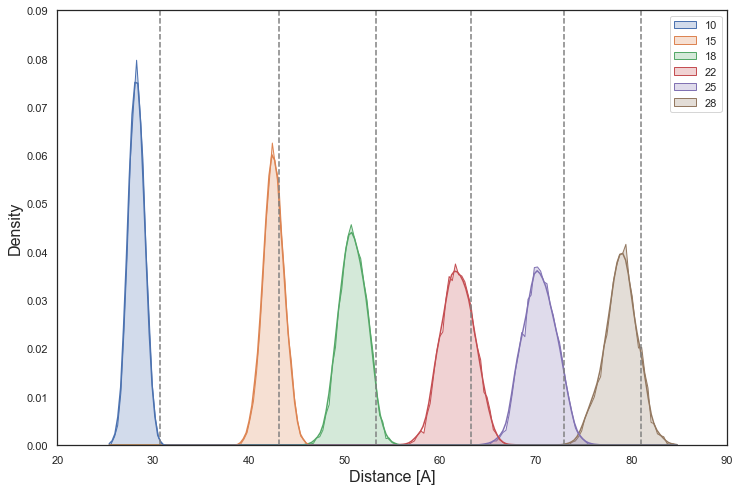

In [35]:
xlim = (20,90)
ylim = (0,0.09)
plot_histograms(dist_all_rna_long,idx_all_rna_long,exp_rna_long,xlim,ylim,False)

## C. dsRNA  of Gauger

In [36]:
n_low = 4
mask = [1,1,1,0]

In [37]:
enm_helix = helix_rna_evn
pdb='rna_evn'

eVals, eVecs, links = ANM_analysis(enm_helix, n_low, verbose=True)

NN_all, OO_all, NO_all, ON_all, idx_evn = generate_ensemble(enm_helix, eVecs, eVals, 
                                                            mask, n_samples, scale=scale)

dist_evn = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=0)

write_pdb_nodes(enm_helix, links, eVecs, eVals, pdb, n_models, scale = scale)
write_pdb_modes(enm_helix, eVecs, eVals, pdb, n_models, scale=scale)

number of links: 248
number of nodes: 60
rank of the (180, 180) matrix: 174

lowest 6 eigenvalues: (should be zeros)
[-0.+0.j -0.+0.j -0.+0.j  0.-0.j  0.+0.j  0.+0.j]

next 4 eigenvalues: (should be real)
[0.000029+0.j 0.000036+0.j 0.000056+0.j 0.000207+0.j]
  eVals       ratio    amplitude of oscillation
  0.000029    1.00     1.000
  0.000036    1.25     0.895
  0.000056    1.94     0.718
  0.000207    7.20     0.373

check orthogonality of the eigenvectors that belong to above eigenvalues:
[[ 1.  0.  0. -0.]
 [ 0.  1. -0.  0.]
 [ 0. -0.  1.  0.]
 [-0.  0.  0.  1.]]
reshape lowest 4 eigenvectors from (180, 4)
to (4, 3, 20, 3)
and to (4, 20, 3, 3)


In [38]:
mode = 2

pdb_file = 'pdbs/rna_evn_mode' + str(mode) + '.pdb'

with open(pdb_file) as ifile:
    system = "".join([x for x in ifile])
    
view = py3Dmol.view()
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
view.animate({'loop': "backAndForth"})
view.zoomTo()
view.show()    

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [39]:
enm_helix = helix_rna_odd

eVals, eVecs, links = ANM_analysis(enm_helix, n_low, verbose=False)

NN_all, OO_all, NO_all, ON_all, idx_odd = generate_ensemble(enm_helix, eVecs, eVals, 
                                                            mask, n_samples, scale=scale)
dist_odd = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=0)

number of links: 248
number of nodes: 60
reshape lowest 4 eigenvectors from (180, 4)
to (4, 3, 20, 3)
and to (4, 20, 3, 3)


In [40]:
dist_all_rna = np.concatenate([dist_evn,dist_odd],axis=-1)
idx_all_rna = np.concatenate([idx_evn,idx_odd],axis=-1)

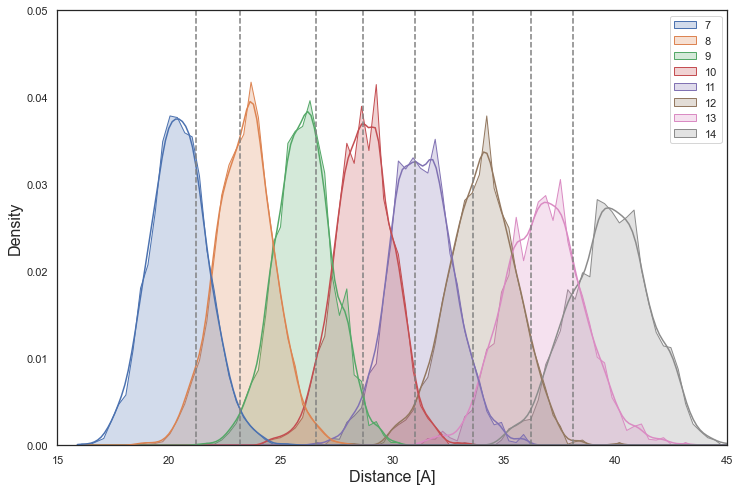

In [41]:
xlim = (15,45)
ylim = (0,0.05)
plot_histograms(dist_all_rna,idx_all_rna,exp_rna,xlim,ylim,False)

### Get Euler angles between each spin label and the first one

In [42]:
#from utils_peldor import labels_orientation
#from scipy.spatial.transform import Rotation as R

In [43]:
#rots, odd_id_rna = labels_orientation(helix_rna_odd)
#for i in range(len(odd_id_rna)):
#    r = R.from_matrix(rots[i])
#    print(r.as_euler('zyx', degrees=True))